<a href="https://colab.research.google.com/github/VettoriKev/Machine-Learning/blob/main/Vettori_TrabajoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificador de Fruta con redes neuronales
## Trabajo Final

##### Vettori, Kevin Osvaldo
---


Dataset: [Horea Muresan, Mihai Oltean, Fruit recognition from images using deep learning, Acta Univ. Sapientiae, Informatica Vol. 10, Issue 1, pp. 26-42, 2018.](https://www.kaggle.com/moltean/fruits/version/38))

[link[texto del enlace](https://www.kaggle.com/moltean/fruits/version/38)]


In [1]:
import os
from collections import Counter

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image
from glob import glob
import cv2
from google.colab import drive


from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

import warnings
warnings.filterwarnings('ignore')


In [2]:
#Levantamos el drive
drive.mount('/content/gdrive')

#Configuramos la dirección que se asoscio del dataset extraido de Kaggle
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
%cd /content/gdrive/My Drive/Kaggle

#Descargamos y descomprimimos el zip
!kaggle datasets download -d moltean/fruits
!unzip \*.zip && rm *.zip

Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /content/gdrive/My Drive/Kaggle. Or use the environment method.
unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [3]:
#Guardamos todos los archivos bajo su nombre de dirección
for dirname, _, filenames in os.walk('./fruits-360'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



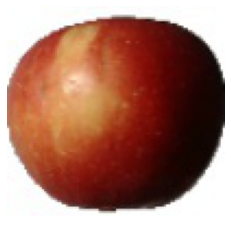

(100, 100, 3)


In [4]:
#Guardamos las direcciónes de los splits
train_dir = './fruits-360_dataset/fruits-360/Training/'
test_dir = './fruits-360_dataset/fruits-360/Test/'

#Graficamos una imagen para vizualizarla
img = load_img(train_dir + "Apple Braeburn/0_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()

# Mostramos las dimensiónes de la misma
x = img_to_array(img)
print(x.shape)



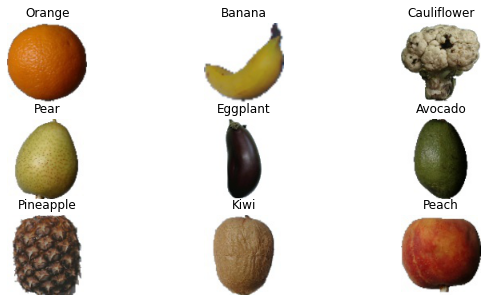

In [5]:
#Vemos algunas más
images = ['Orange', 'Banana', 'Cauliflower', 'Pear', 'Eggplant', 'Avocado', 'Pineapple','Kiwi', 'Peach']
fig = plt.figure(figsize =(10,5))
for i in range(len(images)):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_dir + images[i] +"/0_100.jpg", target_size=(100,100)))

In [6]:
fruits = []
fruits_image = []
for i in os.listdir(train_dir):
    for image_filename in os.listdir(train_dir + i):
        fruits.append(i) # Nombre de la fruta 
        fruits_image.append(i + '/' + image_filename) # Imagen de la fruta

In [7]:
train_fruits = pd.DataFrame(fruits, columns=["Fruits"])
train_fruits["Fruits Image"] = fruits_image

In [8]:
train_fruits.sample(6)

,Fruits,Fruits Image
3078,Apple Pink Lady,Apple Pink Lady/4_100.jpg
32591,Mango,Mango/r_310_100.jpg
23030,Grape Blue,Grape Blue/361_100.jpg
38920,Peach 2,Peach 2/r_96_100.jpg
20216,Dates,Dates/51_100.jpg
48589,Pepper Orange,Pepper Orange/285_100.jpg


In [9]:
from collections import Counter
newData = Counter(train_fruits["Fruits"])
most_fruits = newData.most_common(10)

print("Las 10 frutas mas frecuentes :")
most_fruits

Las 10 frutas mas frecuentes :


[('Grape Blue', 984),
 ('Plum 3', 900),
 ('Cherry Rainier', 738),
 ('Cherry 2', 738),
 ('Melon Piel de Sapo', 738),
 ('Peach 2', 738),
 ('Strawberry Wedge', 738),
 ('Tomato 1', 738),
 ('Tomato 3', 738),
 ('Walnut', 735)]

In [10]:
x,y = zip(*most_fruits)
x,y = list(x),list(y)

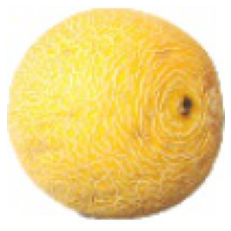

In [11]:
img = load_img(train_dir + "Cantaloupe 1/r_234_100.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [12]:
#Definimos como va a ser la entrada a nuestra red, vemos que son imagenes de 100x100 en color (Por eso el ultimo 3)

array_image = img_to_array(img)
print("Dimensión de las imagenes", array_image.shape)

Dimensión de las imagenes (100, 100, 3)


In [13]:
fruitCountUnique = glob(train_dir + '/*' )
numberOfClass = len(fruitCountUnique)
print("Cantidad de frutas distintas : ",numberOfClass)

Cantidad de frutas distintas :  131


Creamos nuestro modelo de red neuronal

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = array_image.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("softmax"))

Preparamos para entrenar

In [ ]:
epochs = 50
batch_size = 32

In [ ]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [17]:
print("Tamaño de las imagenes a analizar : ", array_image.shape[:2])

Tamaño de las imagenes a analizar :  (100, 100)


In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                   shear_range = 0.3,
                   horizontal_flip=True,
                   zoom_range = 0.3)

test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size= array_image.shape[:2],
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 67692 images belonging to 131 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print("data_batch shape --> ",data_batch.shape)
    print("labels_batch shape --> ",labels_batch.shape)
    break

data_batch shape -->  (32, 100, 100, 3)
labels_batch shape -->  (32, 131)


In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir, 
        target_size= array_image.shape[:2],
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22688 images belonging to 131 classes.


Y entrnamos

In [ ]:
hist = model.fit_generator(
        generator = train_generator,
        steps_per_epoch = 1600 // batch_size,
        epochs=epochs,
        validation_data = test_generator,
        validation_steps = 800 // batch_size)

Epoch 1/50
50/50 [==============================] - 546s 11s/step - loss: 4.6254 - accuracy: 0.0331 - val_loss: 4.1285 - val_accuracy: 0.0812
Epoch 2/50
50/50 [==============================] - 533s 11s/step - loss: 3.8503 - accuracy: 0.1013 - val_loss: 3.2088 - val_accuracy: 0.2262
Epoch 3/50
50/50 [==============================] - 499s 10s/step - loss: 3.2205 - accuracy: 0.1750 - val_loss: 2.6808 - val_accuracy: 0.2775
Epoch 4/50
50/50 [==============================] - 483s 10s/step - loss: 2.6465 - accuracy: 0.2837 - val_loss: 2.2422 - val_accuracy: 0.3975
Epoch 5/50
50/50 [==============================] - 488s 10s/step - loss: 2.2277 - accuracy: 0.3625 - val_loss: 1.4869 - val_accuracy: 0.6275
Epoch 6/50
50/50 [==============================] - 464s 9s/step - loss: 1.7801 - accuracy: 0.4800 - val_loss: 1.3008 - val_accuracy: 0.6438
Epoch 7/50
50/50 [==============================] - 435s 9s/step - loss: 1.6897 - accuracy: 0.4931 - val_loss: 1.1547 - val_accuracy: 0.6875
Epoch 8/

Ahora graficamos el modelo de perdidas y el de accuracy

In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

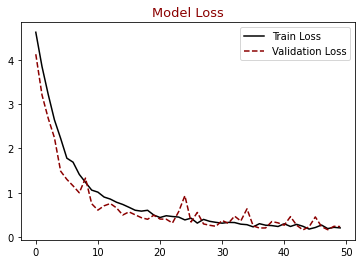

In [ ]:
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "black")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "darkred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

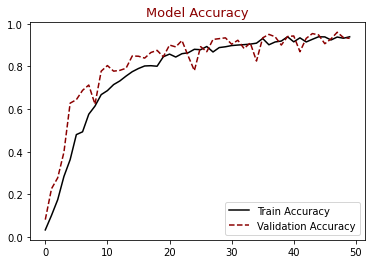

In [ ]:
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "darkred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()